## Homework: Least Action using Minimization
Use function "minimize from scipy.optimize" and the method called ‘SLSQP’ to minimize: the action S.

This task is basically identical to the example from the class. Use the same parameters (t=3.0,m=0.2 n=21) and both functions: xfit() and S().

For more details on the scipy.optimize.minimize read the documentation:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

Please note that the output of this function is different that from the "optimize.fmin_powell" that we did in the class

here: obj = scipy.optimize.minimize(...)
the output of the process is an object (obj) so to access the information of the minimization you can type:

print(obj), or print(dir(obj))
look at the attributes (x, success, status, message, fun)
then choose the attribute you are interested in, example:
print(obj.message)

details on the attributes are here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult)

compare by plotting the two minimization routines, the one from the class "optimize.fmin_powell" with "scipy.optimize.minimize"

In [1]:
#Libraries 
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt

#Funtions from the class

#Action:
def S(x,tend=3.,m=0.2,xini=0.,xend=0.):
    
    x=np.asarray(x)
    Dt=tend/x[:-1].size
    #Fix initial and final point
    x[0]=xini
    x[-1]=xend
    return ( (0.5*m*(x[1:]-x[:-1])**2/Dt**2-0.5*m*g*(x[1:]+x[:-1]) )*Dt).sum()

#Least Action with optimize.fmin_powell
def xfit(n,t=3.,m=0.2,xini=0.,xend=0.,ftol=1E-8):
    '''Find the array of n (odd) components that minimizes the action S(x)
    :Parameters:
    n: odd integer 
        dimension of the ndarray x that minimizes the action  S(x,t,m)
    t,m: numbers
       optional parameters for the action
    ftol: number
        acceptable relative error in S(x) for convergence.
    :Returns: (x,xmax,Smin)    
    x: ndarray
        minimizer of the action S(x)        
    xini:    
    xend:
    xmax: number
        Maximum height for the object
    Smin: number
        value of function at minimum: Smin = S(x)
    '''  
    t=float(t)
    if n%2==0:
        print ( 'x array must be odd')
        sys.exit()
    x0=np.zeros(n)
    a = sp.fmin_powell(S,x0,args=(t,m,xini,xend),ftol=ftol,full_output=1)
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a[1]
    Dt=t/x[:-1].size #  t/(n-1)
    return x,xmax,Smin,Dt


In [2]:
#Parameters 
t=3.0
m=0.2
g = 9.8
n = 21

#Least Action using fmin_powell
y = xfit(n)

Optimization terminated successfully.
         Current function value: -21.554977
         Iterations: 28
         Function evaluations: 5837


In [3]:

#Least Action using Minimization
x0 = np.zeros(n)
res = sp.minimize(S, x0, args=(t,m), method= "SLSQP")

print("The attributes are: \n {} \n ".format(dir(res)))
print("Array: \n {} \n".format(res.x))
print("Current function value: \n {}".format(res.fun))
print("Iterations: \n {}".format(res.nit))

The attributes are: 
 ['fun', 'jac', 'message', 'nfev', 'nit', 'njev', 'status', 'success', 'x'] 
 
Array: 
 [ 0.          2.09479625  3.96899864  5.62271249  7.05593218  8.26871297
  9.26087282 10.03259583 10.58378604 10.91448475 11.02473448 10.91448467
 10.58378615 10.03259516  9.26087246  8.26871223  7.05593341  5.62271053
  3.96899997  2.09479527  0.        ] 

Current function value: 
 -21.554977470134183
Iterations: 
 14


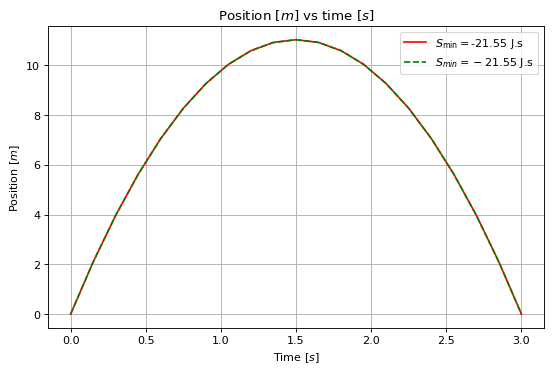

In [4]:
#Plot

tx=np.linspace(0, 3, 21)
x=y[0]
Smin = y[2]

plt.figure(figsize=(8, 5), dpi=80)
plt.plot(tx,x,color = "red" ,label='$S_{\mathrm{min}}=$%.2f J.s' %Smin)
plt.plot(tx, res.x, color = "green", linestyle = "--" , label = "$S_{min} = %.2f $ J.s" %res.fun)
plt.ylabel("Position $[m]$")
plt.xlabel("Time $[s]$")
plt.title("Position $[m]$ vs time $[s]$")
plt.grid()
plt.legend();